In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import matplotlib.colors as mcolors
import pandas as pd
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 18})
import json
import glob

In [2]:
def jsonload(fname):
    with open(fname) as jsonfile:
        try:
            return json.load(jsonfile)
        except Exception:
            print(fname)
            
def json_phasescan(indir = ""):
    fdir = f"{indir}"
    fnames = list(np.sort(glob.glob(f"{fdir}/*.json")))
    fnames1 = np.array([y.split(".") for y in [x for x in np.array([x.split("/") for x in fnames])[:,-1]]])[:,0]
    data = [jsonload(fname) for fname in fnames]
    erx_errcounts = []
    for i in range(len(data)):
        for j in range(len(data[i]['tests'])):
            if 'metadata' in data[i]['tests'][j]:
                if "test_io.py::test_ePortRXPRBS" in data[i]['tests'][j]['nodeid']:
                    erx_errcounts.append(data[i]['tests'][j]['metadata']['eRX_errcounts'])
                    
    erx_errcounts = np.array(erx_errcounts)
    return fnames1, erx_errcounts

def plot_eRx_phaseScan(_fileName=None,dataArray=None,outputFileName=None,title='eRx Phase Scan'):
    if dataArray is None:
        data=np.load(_fileName)
    else:
        data=dataArray

    fig,ax=plt.subplots(figsize=(7,5))

    ## plots the transmission errors rate; change the directory to save the plot
    a,b=np.meshgrid(np.arange(12),np.arange(15))
    norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 255, vcenter = 15)

    h=plt.hist2d(a.flatten(),b.flatten(),weights=data.flatten(),bins=(np.arange(13)-.5,np.arange(16)-.5),cmap='bwr',norm=norm,figure=fig);
    cb=fig.colorbar(h[3])
    cb.set_label(label='Data transmission errors in PRBS',size=11)
    cb.ax.set_yscale('linear')

    plt.ylabel('Phase Select Setting', size=13)
    plt.xlabel('Channel Number', size=13)
    plt.xticks(np.arange(12))
    plt.yticks(np.arange(15))
    plt.title(title)
    if outputFileName is not None:
        plt.savefig(outputFileName,dpi=300, facecolor = "w")

    plt.close(fig)

    return fig


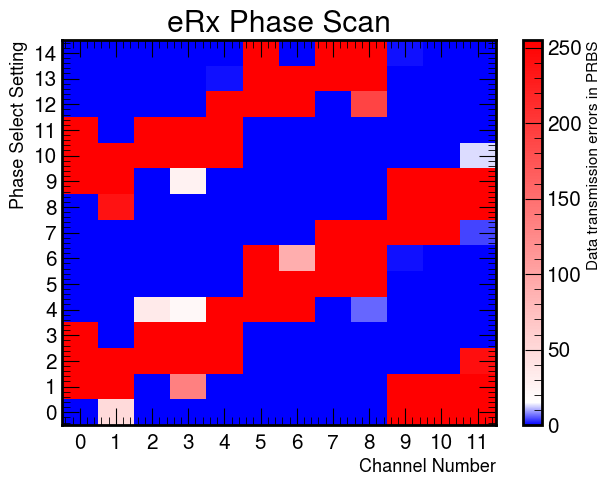

In [4]:
plot_eRx_phaseScan(_fileName=json_phasescan("/Users/alexcampbell/Documents/Research/Fermilab/econ_plotting/exampleData")[0],dataArray = json_phasescan("/Users/alexcampbell/Documents/Research/Fermilab/econ_plotting/exampleData")[1],outputFileName=None,title='eRx Phase Scan')